# Случайные блуждания на графах

Материалы:
* Макрушин С.В. "Лекция 5: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
    * https://networkx.org/documentation/stable/reference/algorithms/centrality.html
        

## Случайное блуждание 

1.1. Загрузить граф Karate Club. Получить матрицу смежности `A` этого графа и получить на ее основе матрицу переходов `P`. Продемонстрировать, что выполняются условия (1) и (2).

$0 \le p_{ij} \le 1$ (1)

$\sum_j p_{ij}=1$    (2)

In [1]:
import networkx as nx
import numpy as np
G = nx.karate_club_graph()

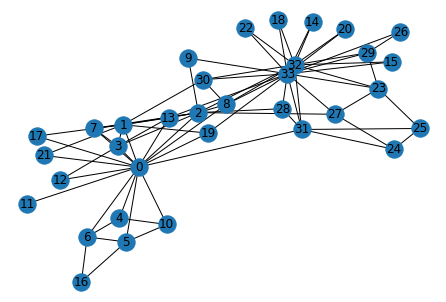

In [2]:
nx.draw(G,with_labels=True)

In [3]:
A = nx.adjacency_matrix(G)
A.todense()#матрица смежности

matrix([[0, 1, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int32)

In [4]:
D_diag = np.array(A.sum(axis=1)).reshape(1,len(A.todense()))
D = np.diag(D_diag[0])
D

array([[16,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  6,  0,  0],
       [ 0,  0,  0, ...,  0, 12,  0],
       [ 0,  0,  0, ...,  0,  0, 17]])

In [5]:
P = np.linalg.inv(D) @ A
P

array([[0.        , 0.0625    , 0.0625    , ..., 0.0625    , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.1       , 0.        , ..., 0.        , 0.1       ,
        0.        ],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.16666667,
        0.16666667],
       [0.        , 0.        , 0.08333333, ..., 0.08333333, 0.        ,
        0.08333333],
       [0.        , 0.        , 0.        , ..., 0.05882353, 0.05882353,
        0.        ]])

In [6]:
P.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
((P>=0) & (P<=1)).sum(axis=1)

array([34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
       34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34])

1.2 Создайте вектор начального состояния $\mathbf{p}^0$. Получите стационарное состояние $\mathbf{p}^\infty$, используя итеративную процедуру

$\mathbf{p}^{t+1}=(\mathbf{P}^{\top})\mathbf{p}^t$ 

In [8]:
p_t = np.array([1]+[0]*(len(P[0])-1))
p_t_1 = P.T @ p_t.reshape(-1,1)
eps = 0.0001
J = np.linalg.norm(p_t-p_t_1.reshape(1,len(P[0]))[0])
while J > eps:
    p_t = p_t_1
    p_t_1=P.T @ p_t_1
    J = np.linalg.norm(p_t-p_t_1)

In [9]:
p_t_1

array([[0.10286557],
       [0.05777889],
       [0.06409539],
       [0.03853326],
       [0.01934838],
       [0.02581708],
       [0.02581708],
       [0.02568675],
       [0.03202124],
       [0.0128005 ],
       [0.01934838],
       [0.00643196],
       [0.01285599],
       [0.03207783],
       [0.01278004],
       [0.01278004],
       [0.01292196],
       [0.01285329],
       [0.01278004],
       [0.01924436],
       [0.01278004],
       [0.01285329],
       [0.01278004],
       [0.03193983],
       [0.01917113],
       [0.01916686],
       [0.01277467],
       [0.02557242],
       [0.01919544],
       [0.02554847],
       [0.02560471],
       [0.03838172],
       [0.07670161],
       [0.10869174]])

1.3. Найдите матрицу перехода к стационарному состоянию $(\mathbf{P}^{\top})^\infty$

In [10]:
p_t = np.array([1]+[0]*(len(P[0])-1))
P_ = P.copy()
p_t_1 = P_.T @ p_t.reshape(-1,1)
eps = 0.0001
J = np.linalg.norm(p_t-p_t_1.reshape(1,len(P[0]))[0])
while J > eps:
    P_= P_ @ P
    p_t_2 = p_t_1
    p_t_1 = P_.T @ p_t
    J = np.linalg.norm(p_t_2-p_t_1)

In [11]:
P_

array([[0.10286557, 0.05777889, 0.06409539, ..., 0.03838172, 0.07670161,
        0.10869174],
       [0.10271802, 0.05773664, 0.064099  , ..., 0.03842076, 0.0768101 ,
        0.10883022],
       [0.10255263, 0.0576891 , 0.0641029 , ..., 0.03846456, 0.07693155,
        0.10898518],
       ...,
       [0.10235126, 0.05763114, 0.0641076 , ..., 0.03851791, 0.07707931,
        0.10917372],
       [0.10226881, 0.05760758, 0.06410962, ..., 0.03853966, 0.07714054,
        0.10925189],
       [0.10229811, 0.057616  , 0.06410893, ..., 0.0385319 , 0.07711898,
        0.10922439]])

1.4. Создайте вектор начального состояния $\mathbf{p}^0$. Получите стационарное состояние $\mathbf{p}^\infty$, воспользовавшись полученной матрицей $(\mathbf{P}^{\top})^\infty$.

In [12]:
P_.T @ p_t

array([0.10286557, 0.05777889, 0.06409539, 0.03853326, 0.01934838,
       0.02581708, 0.02581708, 0.02568675, 0.03202124, 0.0128005 ,
       0.01934838, 0.00643196, 0.01285599, 0.03207783, 0.01278004,
       0.01278004, 0.01292196, 0.01285329, 0.01278004, 0.01924436,
       0.01278004, 0.01285329, 0.01278004, 0.03193983, 0.01917113,
       0.01916686, 0.01277467, 0.02557242, 0.01919544, 0.02554847,
       0.02560471, 0.03838172, 0.07670161, 0.10869174])

1.5. Напишите функцию `generate_walk`, которая принимает на вход граф `G`, начальный узел `node` и генерирует случайное блуждание длины `walk_len`, начинающееся с этого узла. 

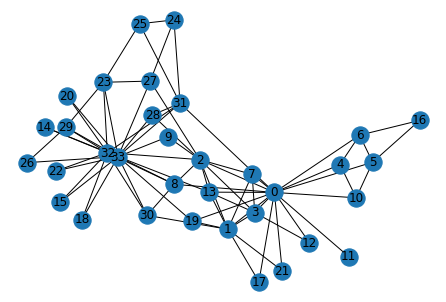

In [13]:
nx.draw(G,with_labels=True)

In [14]:
def generate_walk(G, node, walk_len):
    G_edg=list(G.edges)
    k=0
    next_node=node
    walk=[]
    while k<=walk_len:
        walk.append(next_node)
        next_node_list=[]
        for i in G_edg:
            if i[0]==next_node:
                next_node_list.append(i[1])
            if i[1]==next_node:
                next_node_list.append(i[0])
        next_node=np.random.choice(next_node_list)
        k+=1
    return walk

In [15]:
walk=generate_walk(G, 1, 100)
print(walk)

[1, 7, 0, 12, 0, 6, 16, 5, 16, 6, 0, 4, 6, 5, 6, 5, 10, 5, 16, 6, 0, 4, 6, 4, 10, 0, 2, 8, 2, 32, 2, 28, 31, 32, 33, 26, 33, 13, 3, 13, 2, 32, 14, 33, 22, 33, 14, 32, 33, 23, 33, 20, 33, 9, 2, 3, 12, 0, 19, 0, 2, 8, 0, 7, 2, 27, 2, 9, 2, 1, 19, 33, 15, 32, 33, 13, 2, 32, 31, 24, 25, 31, 32, 29, 33, 27, 24, 31, 32, 31, 32, 33, 15, 32, 31, 24, 31, 24, 31, 28, 33]


## PageRank

2.1 Воспользовавшийся реализаций алгоритма PageRank из `networkx`, вычислите важность каждого узла в сети. Визуализируйте граф, отмасшабировав диаметр каждого узла пропорционально полученным значениям.

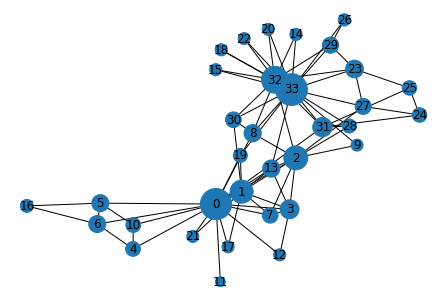

In [16]:
ppr1 = nx.pagerank(G)
nx.draw(G,with_labels=True,node_size=list(map(lambda x: 10000*x, ppr1.values())))

2.2 Визуализируйте граф, используя другие меры центральности: 
- центральность по степени
- центральность по посредничеству
- центральность по близости
- центральность по собственному вектору
- центральность по PageRank

Сравните результаты.

1. центральность по степени

In [17]:
G_dig = dict(nx.degree_centrality(G))

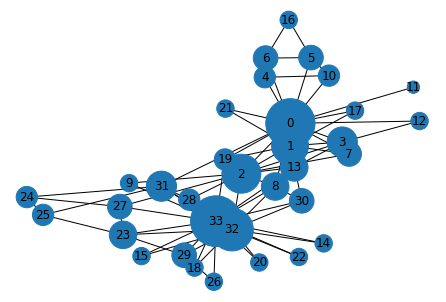

In [18]:
nx.draw(G,with_labels=True,node_size=list(map(lambda x: 5000*x, G_dig.values())))#центральность по степени

2. центральность по посредничеству

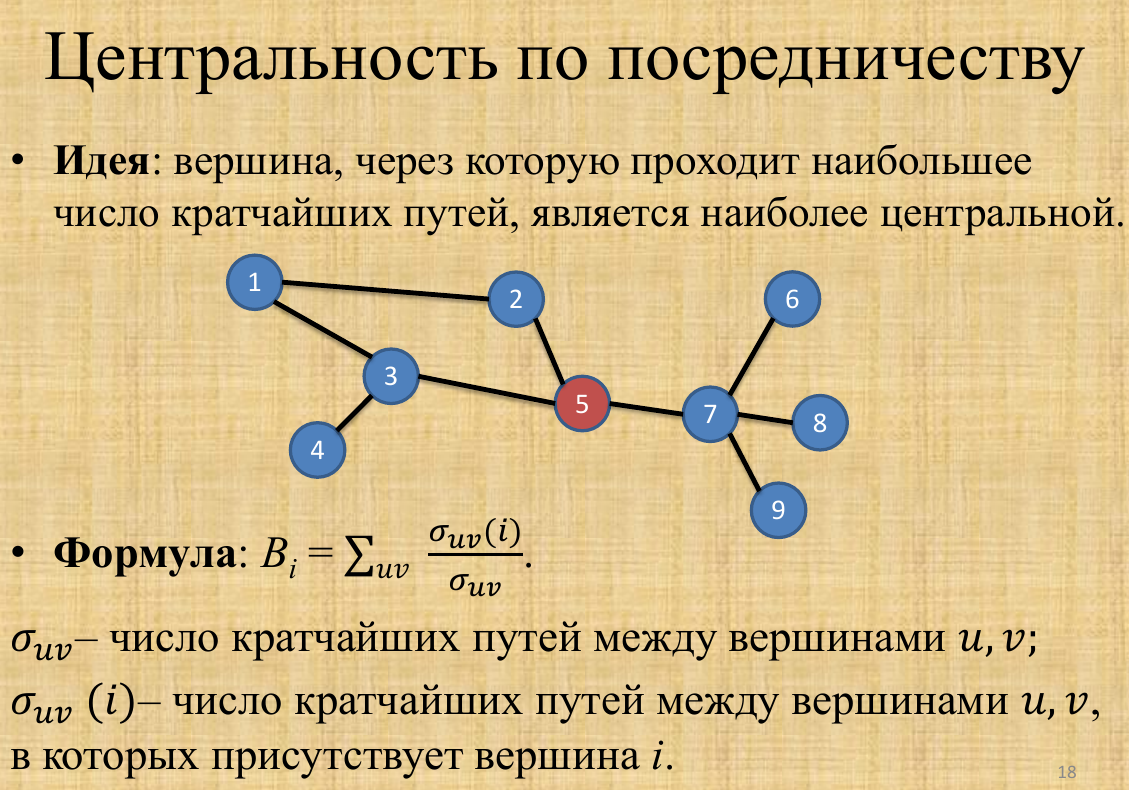

In [19]:
B = [0]*len(G.nodes)
for i in range(len(G.nodes)-1):
    for j in range(i+1,len(G.nodes)):
        all_short_node=list(nx.all_shortest_paths(G,i,j))
        for p in all_short_node:
            if len(all_short_node)!=2:
                for node in p:
                    B[node]+=1

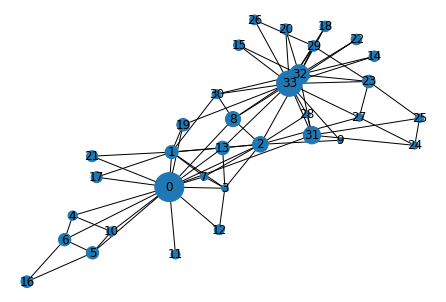

In [20]:
nx.draw(G,with_labels=True,node_size=list(map(lambda x: x, B)))

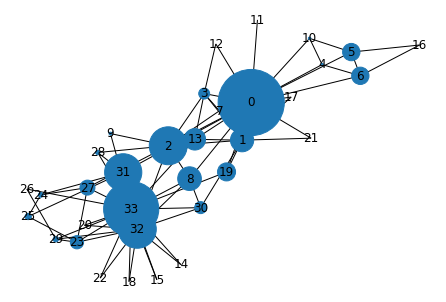

In [21]:
between_dict=dict(nx.betweenness_centrality(G))
nx.draw(G,with_labels=True,node_size=list(map(lambda x: 10000*x, between_dict.values())))

3. центральность по близости

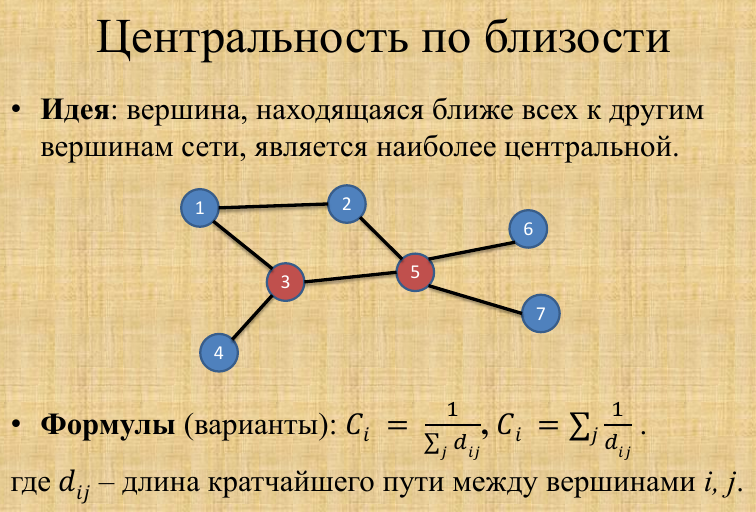

In [22]:
short_p = dict(nx.shortest_path(G))
C= []
for node in short_p:
    short_node = short_p[node]
    C_node=0
    for node_ in short_node:
        C_node+=1/len(short_node[node_])
    C.append(C_node-1)

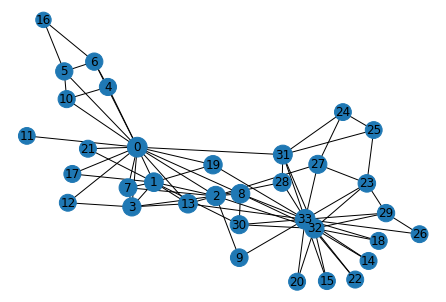

In [23]:
nx.draw(G,with_labels=True,node_size=list(map(lambda x: 30*x, C)))

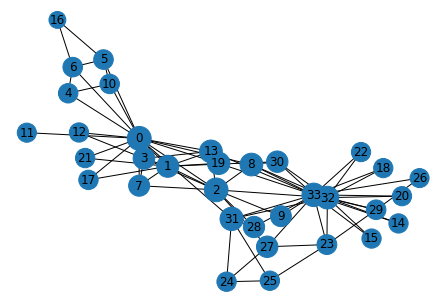

In [24]:
closes_dict=dict(nx.closeness_centrality(G))
nx.draw(G,with_labels=True,node_size=list(map(lambda x: 1000*x, closes_dict.values())))

4. центральность по собственному вектору

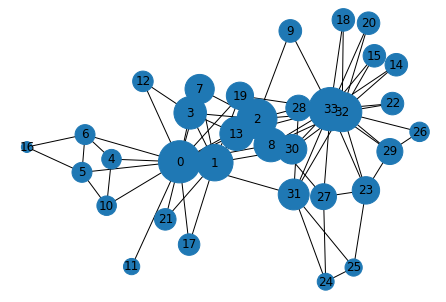

In [25]:
v_dict=dict(nx.eigenvector_centrality(G))
nx.draw(G,with_labels=True,node_size=list(map(lambda x: 5000*x, v_dict.values())))

2.3 Исследовать, как влияют различные значение параметров `alpha` и `personalization` на результат работы алгоритма. Визуализировать результаты и прокомментировать результат

Параметр демпфирования для PageRank, по умолчанию=0.85.

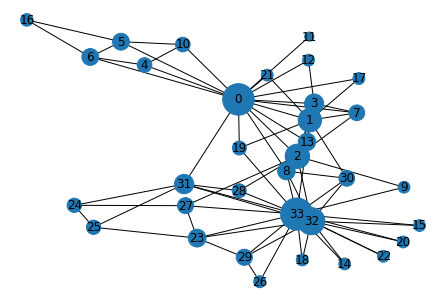

In [26]:
ppr1 = dict(nx.pagerank(G,alpha=0.9))
nx.draw(G,with_labels=True,node_size=list(map(lambda x: 10000*x, ppr1.values())))

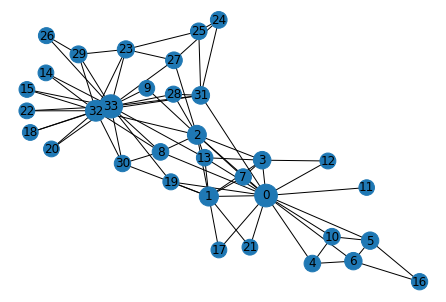

In [29]:
ppr1 = dict(nx.pagerank(G,alpha=0.2))
nx.draw(G,with_labels=True,node_size=list(map(lambda x: 10000*x, ppr1.values())))

«Вектор персонализации», состоящий из словаря с ключом некоторого подмножества узлов графа и значением персонализации каждого из них. По крайней мере одно значение персонализации должно быть ненулевым. Если не указано, значение персонализации узлов будет равно нулю. По умолчанию используется равномерное распределение.

2.4 Реализовать алгоритм PageRank с параметром затухания $\alpha=0.9$.

Обратите внимание, что алгоритм PageRank подразумевает, что граф является ориентированным.

## Метод распространения меток

3.1 Загрузить граф Karate Club. Получите значения атрибута `club`, хранящегося на узлах. Выберите случайным образом 4 узла, относящихся к клубу `Mr. Hi` и 4 узла, относящихся к клубу `Officer`. Получите матрицу смежности, в которой узлы перенумерованы  таким образом, чтобы строки и столбцы с номерами 0, 1, ... 7 принадлежали узлам, которые были выбраны на предыдущем шаге.

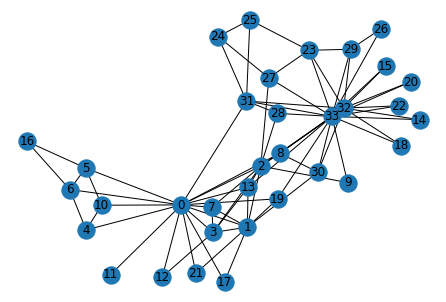

In [30]:
nx.draw(G,with_labels=True)

In [31]:
mr_hi=[]
officer=[]
for i in range(len(G.nodes)):
    if G.nodes[i]['club']=='Mr. Hi':
        mr_hi.append(i)
    if G.nodes[i]['club']=='Officer':
        officer.append(i)

In [32]:
import random
mr_hi_4=random.sample(mr_hi,4)
officer_4=random.sample(officer,4)
mr_hi_and_officer=mr_hi_4+officer_4
mr_hi_and_officer

[19, 6, 12, 7, 29, 23, 25, 20]

In [33]:
new_node=dict()
k=0
for node in mr_hi_and_officer:
    new_node[node]=k
    k+=1

In [34]:
for node in G.nodes:
    if node not in new_node:
        new_node[node]=k
        k+=1

In [35]:
H = nx.relabel_nodes(G.copy(), new_node)

In [36]:
H_new = nx.Graph()
H_new.add_nodes_from(sorted(H.nodes(data=True)))
H_new.add_edges_from(H.edges(data=True))

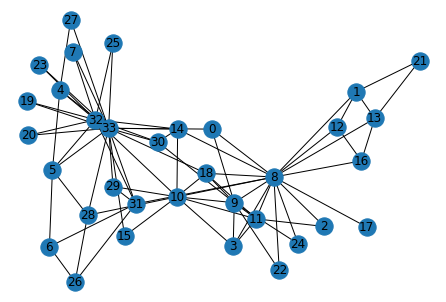

In [37]:
nx.draw(H_new,with_labels=True)

In [38]:
A = nx.adjacency_matrix(H_new)
A.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 1, 0]], dtype=int32)

3.2 Получите блочную матрицу $\mathbf{P}$ и матрицу начального состояния меток $\mathbf{Y_0} \in \{0,1\}^{N\times2}$
$$\mathbf{P} = \begin{pmatrix}
\mathbf{P}_{ll}& \mathbf{P}_{lu}\\
\mathbf{P}_{ul}& \mathbf{P}_{uu}\\
\end{pmatrix} = \begin{pmatrix}
\mathbf{I}& \mathbf{0}\\
\mathbf{P}_{ul}& \mathbf{P}_{uu}\\
\end{pmatrix}$$

$$\mathbf{Y_0} = \begin{pmatrix}
\mathbf{Y_{l}}\\
\mathbf{Y_{u}}\\
\end{pmatrix}= \begin{pmatrix}
\mathbf{Y_{l}}\\
\mathbf{0}\\
\end{pmatrix}$$

In [39]:
D_diag = np.array(A.sum(axis=1)).reshape(1,len(A.todense()))
D = np.diag(D_diag[0])
D

array([[ 3,  0,  0, ...,  0,  0,  0],
       [ 0,  4,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  6,  0,  0],
       [ 0,  0,  0, ...,  0, 12,  0],
       [ 0,  0,  0, ...,  0,  0, 17]])

In [40]:
P = np.linalg.inv(D) @ A
P

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.16666667,
        0.16666667],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.08333333],
       [0.05882353, 0.        , 0.        , ..., 0.05882353, 0.05882353,
        0.        ]])

In [41]:
k=[i for i in range(8)]
for i in range(len(P)):
    for j in range(len(P[i])):
        if i==j and i in k:
            P[i][j]=1
        if i in k and i!=j:
            P[i][j]=0

In [42]:
P

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.16666667,
        0.16666667],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.08333333],
       [0.05882353, 0.        , 0.        , ..., 0.05882353, 0.05882353,
        0.        ]])

In [43]:
P.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
Y=np.array([0]*8*len(P)).reshape(len(P),8)
for i in range(len(P)):
    for j in range(8):
        if i==j and i in k:
            Y[i][j]=1

3.3 Используя Базовый вариант АРМ (см. лекцию), расставить метки для всех узлов. Визуализировать сеть, показав цветом контура вокруг узла принадлежность узла к одному из сообществ, а цветом цветом заливки узла - сообщество, к которому узел был отнесен алгоритмом.

In [45]:
eps = 0.0001
J = 1
step=0
Yt=Y.copy()
while J > eps:
    Yt_1 = Yt.copy()
    Yt = P @ Yt_1
    J = np.linalg.norm(Yt-Yt_1)
    step+=1

In [46]:
for i in range(len(Yt)):
    c=np.argmax(Yt[i])
    for j in range(8):
        if j==c:
            Yt[i][j]=1
        else:
            Yt[i][j]=0

In [47]:
colors=[]
color_node=['red']*4+['green']*4
for i in range(len(Yt)):
    c=np.argmax(Yt[i])
    colors.append(color_node[c])

In [48]:
colors2=[]
for i in range(len(Yt)):
    if H_new.nodes[i]['club']=='Mr. Hi':
        colors2.append('red')
    else:
        colors2.append('green')

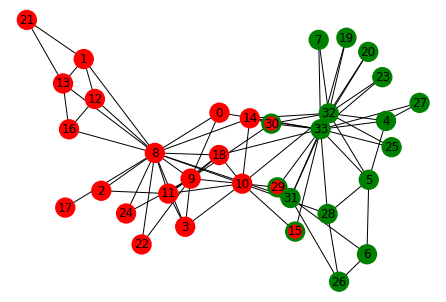

In [49]:
nx.draw(H_new,with_labels=True,node_color=colors, edgecolors=colors2, linewidths=3)